<a href="https://colab.research.google.com/github/nafis195/4QuestionFrame/blob/main/Satellite_Image_Enhancement_for_Weather_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Satellite Image Enhancement for Weather Analysis

Instruction

1. Load satellite images (RGB or grayscale) at least 20 images.
2. Analyze overall brightness/contrast
3. Try edge enhancement to make boundaries clearer
4. Save results + generate comparison visuals
5. Write a simple report on this.

Dataset- https://www.kaggle.com/datasets/whisperingkahuna/tropical-storm-rafael-satellite-image-dataset/

Import Libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

Importing, Reading, Showing Images

In [ ]:
def image_import_read_show():
  # Path to your folder
  image_folder = "/content/drive/MyDrive/Tropical_Storm_Rafael_Satellite_Image_Dataset"

  # Use glob to match the common filename pattern
  # This assumes pattern starts with "final_stitched_image__" and ends with "goes-east.jpg"
  pattern = os.path.join(image_folder, "final_stitched_image__*_goes-east.jpg")
  image_paths = sorted(glob.glob(pattern))[:20]  # Get the first 20 matching images

  # Read and store images
  images = []
  for path in image_paths:
      img = cv2.imread(path)
      if img is not None:
          img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
          images.append(img)
      else:
          print(f"Failed to load: {path}")

  # Display using matplotlib
  rows, cols = 4, 5  # Adjust based on number of images
  fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
  axes = axes.flatten()

  for i in range(rows * cols):
      if i < len(images):
          axes[i].imshow(images[i])
          axes[i].axis('off')
          axes[i].set_title(f"Image {i+1}")
      else:
          axes[i].axis('off')  # Hide unused subplots

  plt.tight_layout()
  plt.show()

  return images


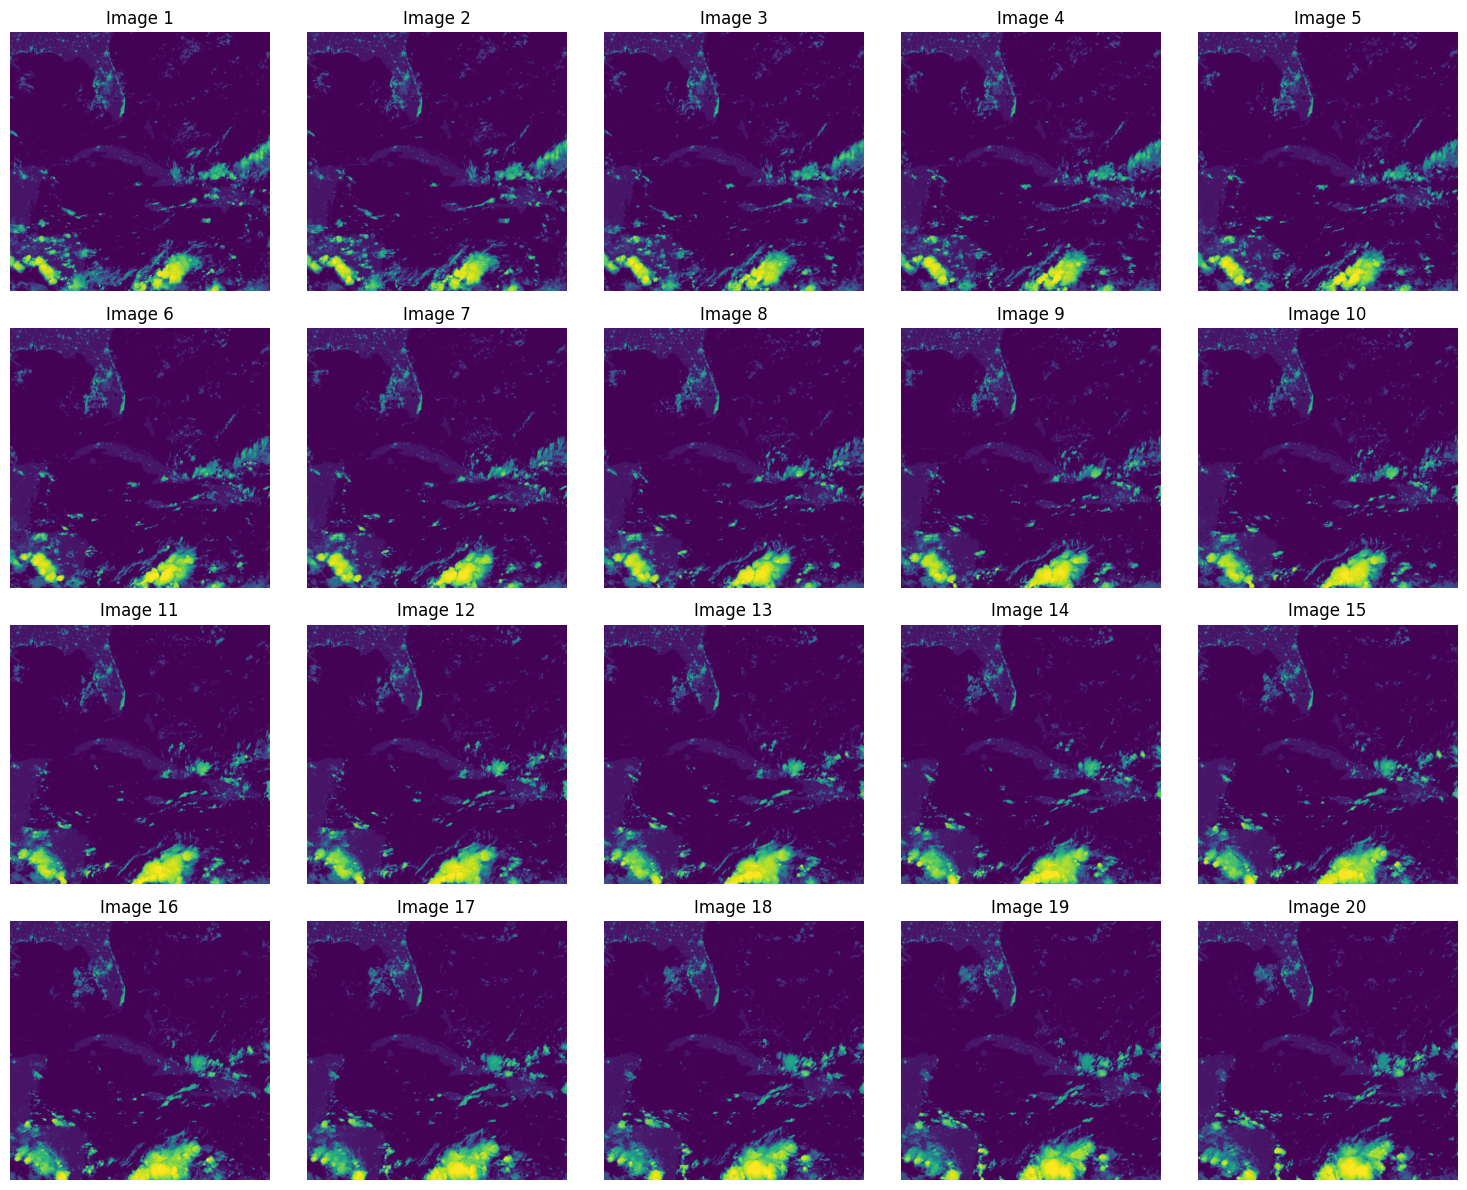

[array([[ 20,   8,   6, ...,   1,   1,   1],
        [ 19,   9,   9, ...,   1,   1,   1],
        [ 16,  11,  13, ...,   1,   1,   1],
        ...,
        [ 94,  86,  62, ...,  54,  53,  59],
        [106, 100,  75, ...,  53,  53,  61],
        [108, 103,  80, ...,  50,  50,  61]], dtype=uint8),
 array([[18,  5,  6, ...,  1,  1,  1],
        [16,  7,  8, ...,  1,  1,  1],
        [15, 10, 12, ...,  1,  1,  1],
        ...,
        [70, 65, 46, ..., 47, 51, 52],
        [73, 73, 57, ..., 49, 50, 61],
        [67, 71, 61, ..., 43, 42, 58]], dtype=uint8),
 array([[12, 25,  8, ...,  1,  1,  1],
        [ 5, 18, 10, ...,  1,  1,  1],
        [11, 21, 16, ...,  1,  1,  1],
        ...,
        [32, 31, 23, ..., 41, 35, 30],
        [24, 28, 25, ..., 40, 37, 40],
        [15, 24, 25, ..., 39, 41, 52]], dtype=uint8),
 array([[16,  8,  9, ...,  1,  1,  1],
        [49, 32, 21, ...,  1,  1,  1],
        [64, 42, 24, ...,  1,  1,  1],
        ...,
        [28, 22, 14, ..., 40, 35, 40],
        [

In [ ]:
image_import_read_show()

In [ ]:
def image_brightness_contrast(gray_images: list):
  for images in gray_images:
    image_brightness = np.mean(images)
    image_contrast = np.std(images)
    print(f"Brightness: {image_brightness}, Contrast: {image_contrast}")

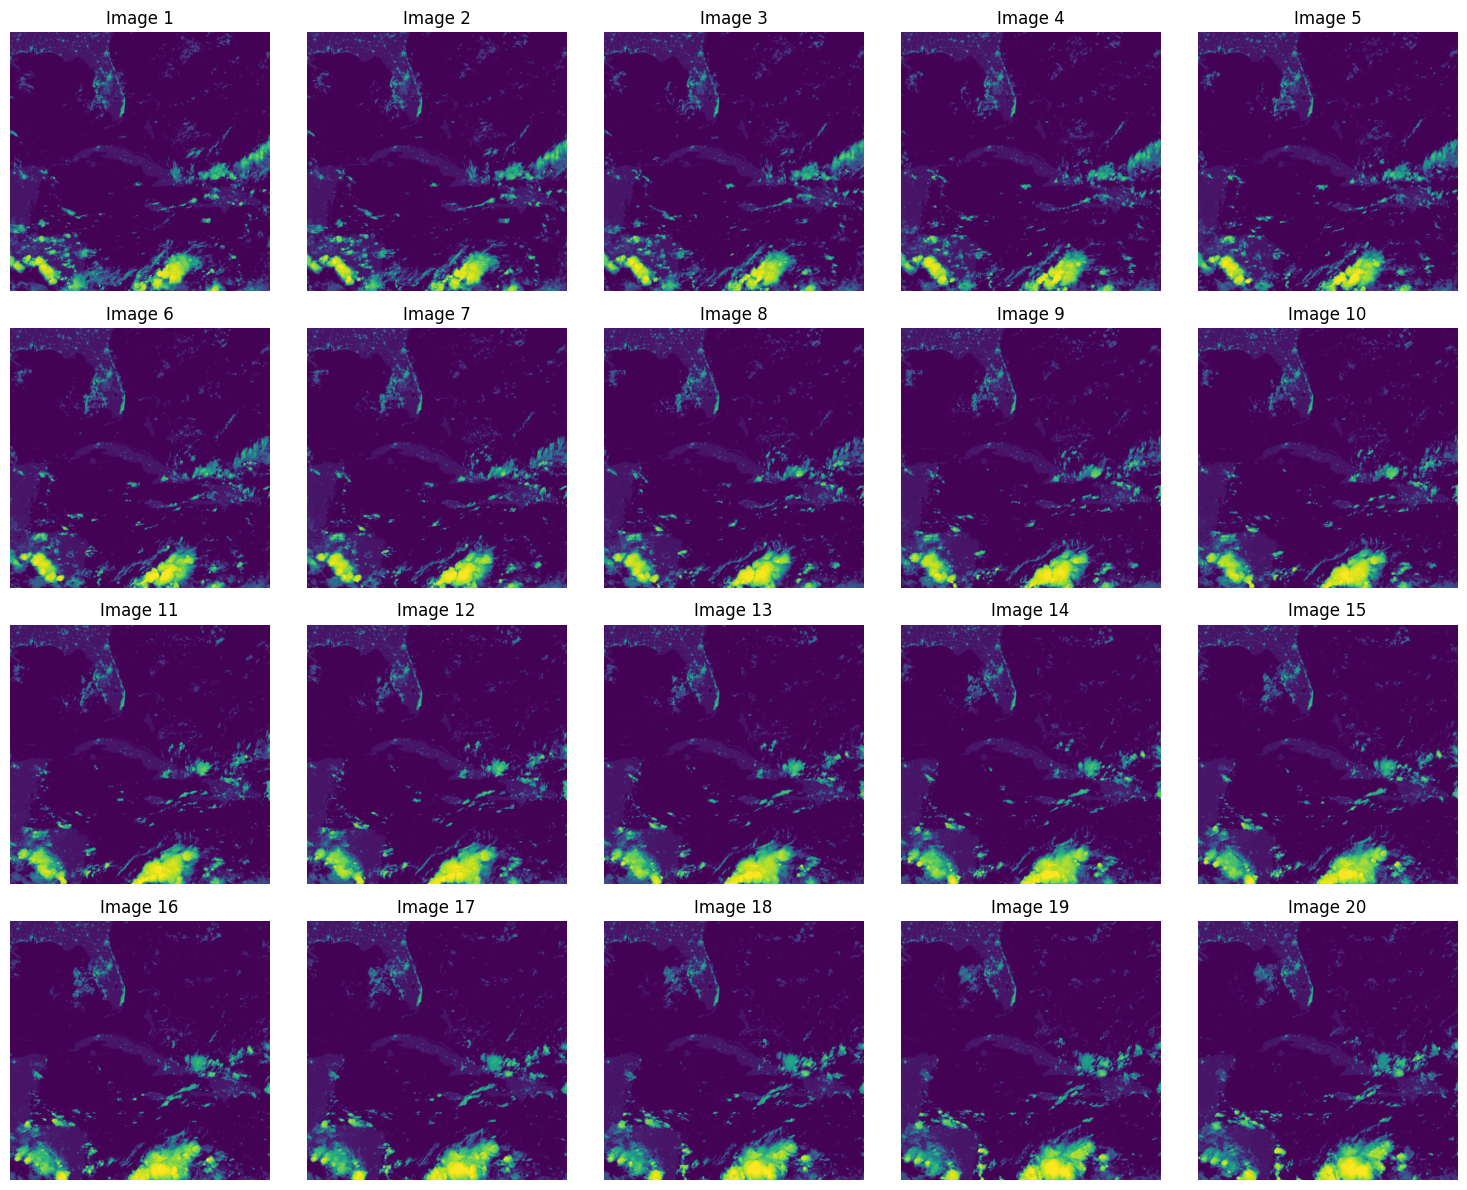

Brightness: 19.51270866394043, Contrast: 43.56168824066841
Brightness: 19.107537269592285, Contrast: 43.26060903660523
Brightness: 18.791748046875, Contrast: 42.93870492144078
Brightness: 18.544245719909668, Contrast: 42.73713181686382
Brightness: 18.35359764099121, Contrast: 42.74943202113533
Brightness: 18.29357147216797, Contrast: 42.97275018341425
Brightness: 18.262761116027832, Contrast: 43.37884299701483
Brightness: 18.23960590362549, Contrast: 43.71158357569639
Brightness: 18.230792999267578, Contrast: 43.94231668576537
Brightness: 18.324861526489258, Contrast: 44.35679066438447
Brightness: 18.640579223632812, Contrast: 44.92743220443202
Brightness: 18.83188533782959, Contrast: 45.234126490085124
Brightness: 19.01657199859619, Contrast: 45.51324193725721
Brightness: 19.16043186187744, Contrast: 45.76960707740695
Brightness: 19.32332420349121, Contrast: 46.04709390791102
Brightness: 19.532883644104004, Contrast: 46.29987098291794
Brightness: 19.702606201171875, Contrast: 46.41103

In [ ]:
images = image_import_read_show()
image_brightness_contrast(images)

In [ ]:
def edge_enhancement(images):
  kernel = np.array([[0, -1, 0],
                     [-1, 5, -1],
                     [0, -1, 0]])

  for image in images:
    sharpened_image = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
    sharpened_rgb = cv2.cvtColor(sharpened_image, cv2.COLOR_GRAY2RGB)
    plt.figure(figsize=(10, 5))
    plt.imshow(sharpened_rgb)
    plt.axis('off')
    plt.show()

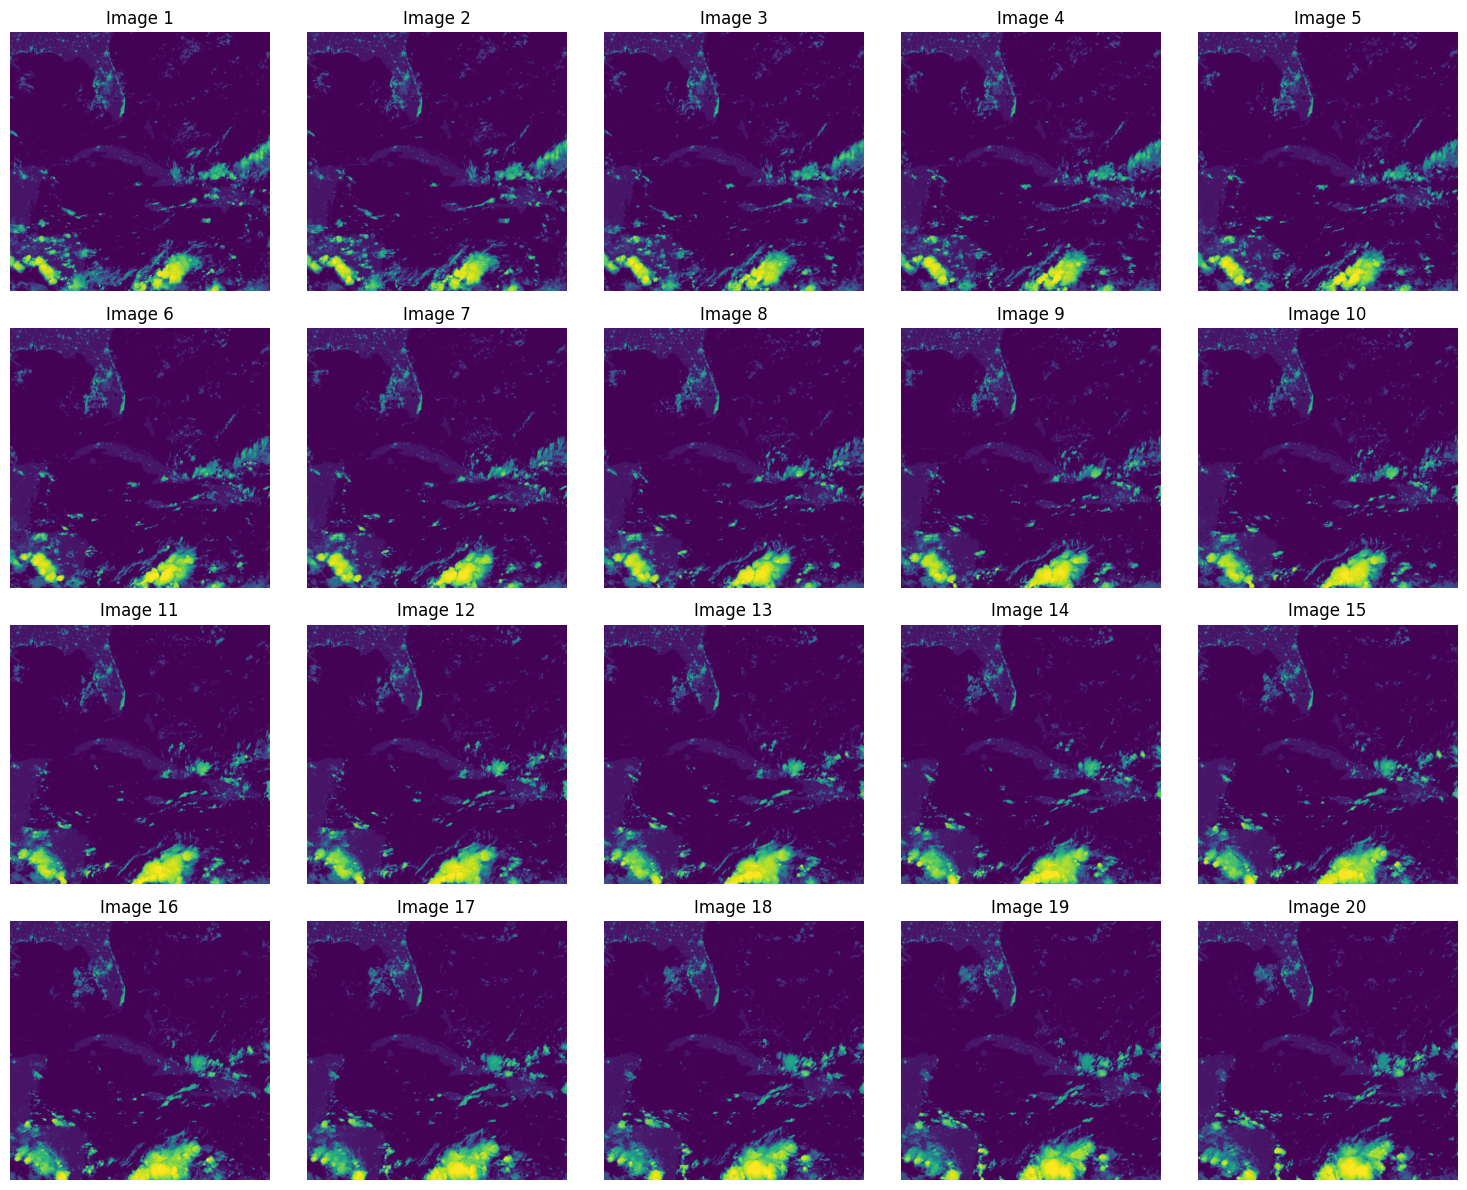

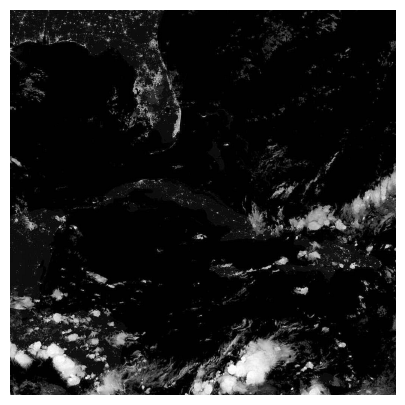

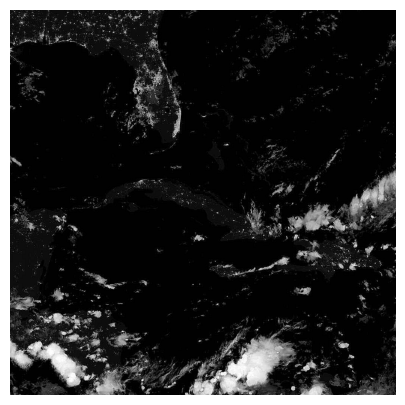

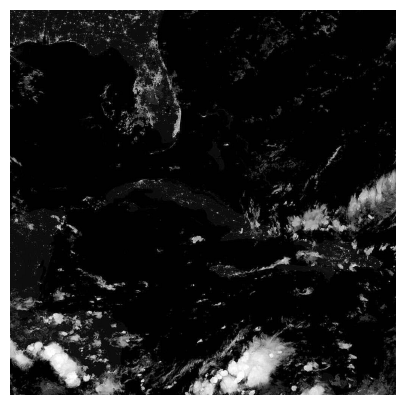

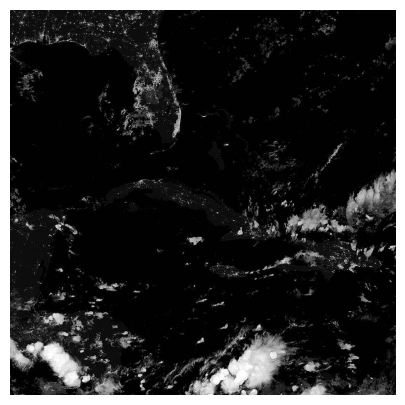

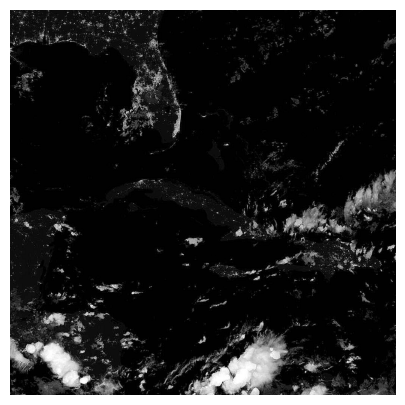

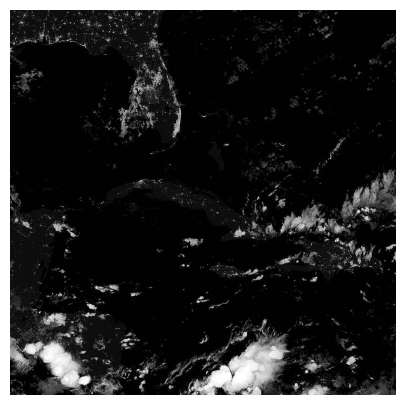

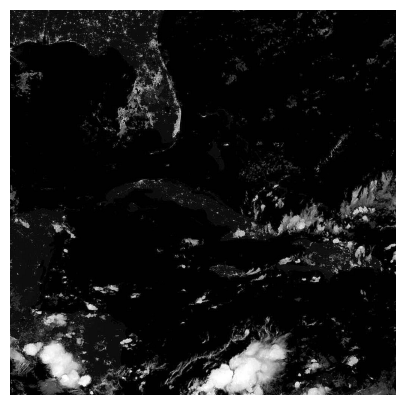

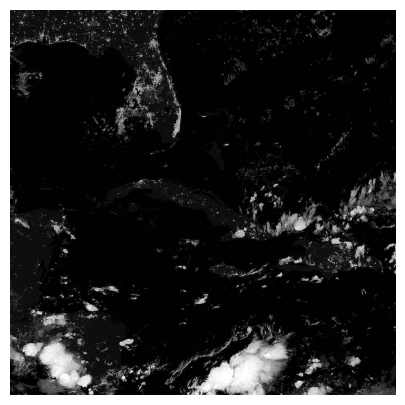

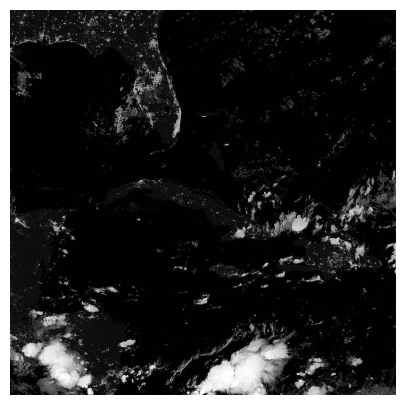

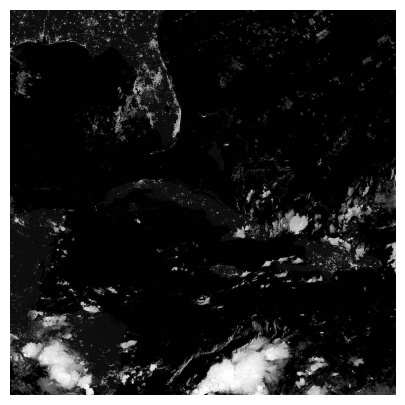

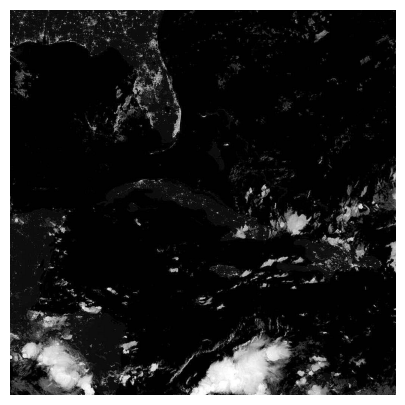

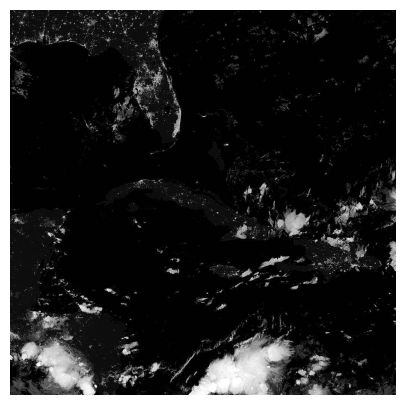

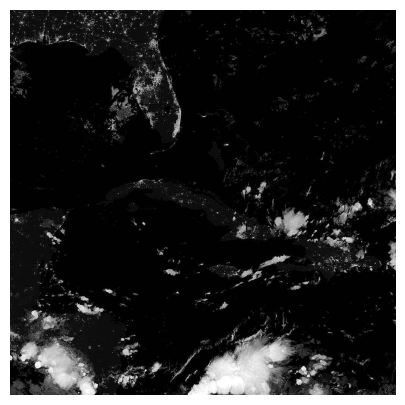

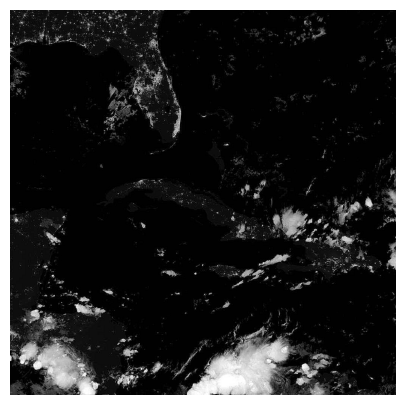

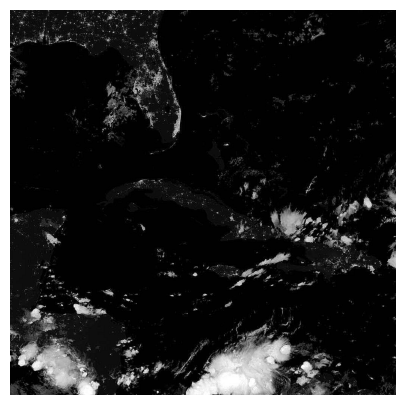

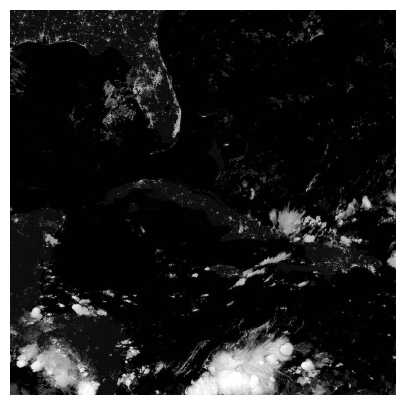

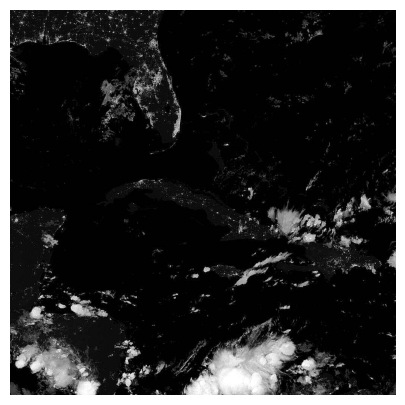

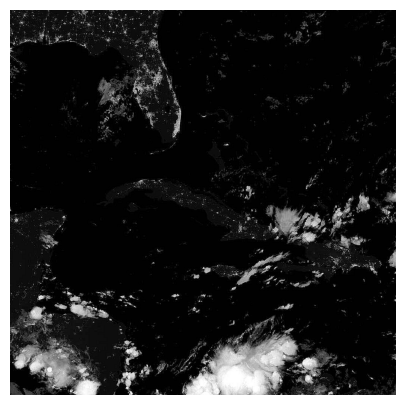

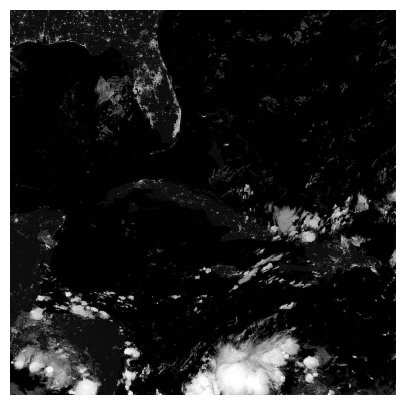

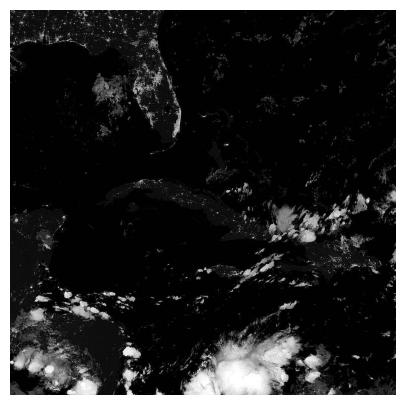

In [ ]:
images = image_import_read_show()
edge_enhancement(images)